In [31]:
# 3.1KNN
"""
KNN（K-Nearest Neighbors）是一种十分有效且易掌握的机器学习算法
国际权威学术会议ICDM曾在2006年评选出数据挖掘十大经典算法
KNN便是其中之一。KNN的算法思想用一句比较通俗的话来讲就是“近朱者赤，近墨者黑”
即同一类事物通常在很多方面都很接近。
例如，金丝猴可以分为黔金丝猴、川金丝猴等多种类别
同一类别的金丝猴会具有一些相似的特征，如毛发颜色、体型大小、尾巴长度等
因此可以通过这些特征来判断金丝猴的种类。KNN就是利用了这一特性
假如存在一个样本数据集，数据集中的每个样本都标记了所属的类别
对于一个未知类别的样本，KNN会先将其与样本集中数据的特征进行比较，然后返回最邻近（最相似）的数据的类别
"""
# 特征空间中的一个样本，如果与其最相似的k个样本中的大部分属于某个类别，则该样本也属于该类别

'\nKNN（K-Nearest Neighbors）是一种十分有效且易掌握的机器学习算法\n国际权威学术会议ICDM曾在2006年评选出数据挖掘十大经典算法\nKNN便是其中之一。KNN的算法思想用一句比较通俗的话来讲就是“近朱者赤，近墨者黑”\n即同一类事物通常在很多方面都很接近。\n例如，金丝猴可以分为黔金丝猴、川金丝猴等多种类别\n同一类别的金丝猴会具有一些相似的特征，如毛发颜色、体型大小、尾巴长度等\n因此可以通过这些特征来判断金丝猴的种类。KNN就是利用了这一特性\n假如存在一个样本数据集，数据集中的每个样本都标记了所属的类别\n对于一个未知类别的样本，KNN会先将其与样本集中数据的特征进行比较，然后返回最邻近（最相似）的数据的类别\n'

In [32]:
# 1)计算测试样本与训练集中所有（或大部分）样本的距离
# 该距离可以是欧氏距离、余弦距离等，较常用的是欧氏距离

In [33]:
# 2)找到步骤1中距离最短的k个样本，作为预测样本的邻居

In [34]:
# 3)对于分类问题，通过投票机制选出k个邻居中最多的类别作为预测样本的预测值
# 对于回归问题，则采用k个邻居的平均值。

In [35]:
# KNN的优点：简单有效，易于实现；无须训练（或训练很快）。
# KNN的缺点：懒惰算法，数据集的样本容量大时计算量比较大，评分慢；样本不平衡时，预测偏差比较大。

In [36]:
# 3.1.2 用KNN预测鸢尾花品种
import pandas as pd
"""
·萼片长度（sepal_length）
·萼片宽度（sepal_width）
·花瓣长度（petal_length）
·花瓣宽度（petal_width）
"""

'\n·萼片长度（sepal_length）\n·萼片宽度（sepal_width）\n·花瓣长度（petal_length）\n·花瓣宽度（petal_width）\n'

In [37]:
# 读取数据
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_data = pd.read_csv(
    data_url,
    sep=",", 
    names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
)
# iris_data = pd.load_iris()

In [38]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [39]:
# 准备做图
from matplotlib import pyplot as plt

In [40]:
# 柱状图显示组平均数
# 可以从图上看吹不同品种的属性特点
# 把不同的品种分成不同的组，3组
grouped_data = iris_data.groupby("class")
grouped_data

In [41]:
# 求组平均值
group_mean = grouped_data.mean()
group_mean

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


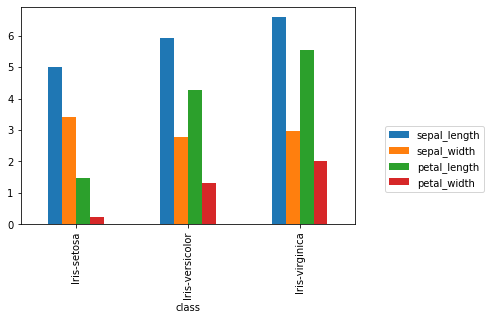

In [42]:
# 绘图
group_mean.plot(kind="bar")
plt.legend(loc="center right", bbox_to_anchor=(1.4, 0.3), ncol=1)
plt.show()

In [43]:
# 我们至少要一个训练集来训练模型
# 一个测试机来检验模型对新样本的预测能力

In [44]:
import numpy as np
# 生成一个随机数并选择小于0.8的数据
msk = np.random.rand(len(iris_data)) < 0.8

train_data_origin = iris_data[msk]
test_data_origin = iris_data[~msk]
train_data_origin

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [45]:
test_data_origin

,sepal_length,sepal_width,petal_length,petal_width,class
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
45,4.8,3.0,1.4,0.3,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa
57,4.9,2.4,3.3,1.0,Iris-versicolor


In [46]:
# 将生成的x训练集train_data和测试集test_data进行索引重制
train_data = train_data_origin.reset_index(drop=True)
test_data = test_data_origin.reset_index(drop=True)

In [47]:
# 训练集label和测试集label
train_label = train_data["class"]
train_label

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
118    Iris-virginica
119    Iris-virginica
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
Name: class, Length: 123, dtype: object

In [48]:
test_label = test_data["class"]
test_label

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9     Iris-versicolor
10    Iris-versicolor
11    Iris-versicolor
12    Iris-versicolor
13    Iris-versicolor
14    Iris-versicolor
15    Iris-versicolor
16    Iris-versicolor
17     Iris-virginica
18     Iris-virginica
19     Iris-virginica
20     Iris-virginica
21     Iris-virginica
22     Iris-virginica
23     Iris-virginica
24     Iris-virginica
25     Iris-virginica
26     Iris-virginica
Name: class, dtype: object

In [49]:
# 训练集特征
train_fea = train_data.drop('class', 1)
train_fea

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.0,3.6,1.4,0.2
3,5.0,3.4,1.5,0.2
4,4.4,2.9,1.4,0.2
...,...,...,...,...
118,6.7,3.0,5.2,2.3
119,6.3,2.5,5.0,1.9
120,6.5,3.0,5.2,2.0
121,6.2,3.4,5.4,2.3


In [50]:
# 测试集特征
test_fea = test_data.drop('class', 1)
test_fea

,sepal_length,sepal_width,petal_length,petal_width
0,4.7,3.2,1.3,0.2
1,4.6,3.1,1.5,0.2
2,5.4,3.9,1.7,0.4
3,4.6,3.4,1.4,0.3
4,4.6,3.6,1.0,0.2
5,4.8,3.1,1.6,0.2
6,5.5,4.2,1.4,0.2
7,4.8,3.0,1.4,0.3
8,5.1,3.8,1.6,0.2
9,4.9,2.4,3.3,1.0


In [51]:
# 样本距离
train_norm= (train_fea - train_fea.min())/(train_fea.max() - train_fea.min())
train_norm

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.051724,0.041667
1,0.166667,0.416667,0.051724,0.041667
2,0.194444,0.666667,0.051724,0.041667
3,0.194444,0.583333,0.068966,0.041667
4,0.027778,0.375000,0.051724,0.041667
...,...,...,...,...
118,0.666667,0.416667,0.706897,0.916667
119,0.555556,0.208333,0.672414,0.750000
120,0.611111,0.416667,0.706897,0.791667
121,0.527778,0.583333,0.741379,0.916667


In [52]:
# 测试同理
test_norm = (test_fea - test_fea.min())/(test_fea.max() - test_fea.min())
test_norm

,sepal_length,sepal_width,petal_length,petal_width
0,0.043478,0.50,0.062500,0.000000
1,0.000000,0.45,0.104167,0.000000
2,0.347826,0.85,0.145833,0.090909
3,0.000000,0.60,0.083333,0.045455
4,0.000000,0.70,0.000000,0.000000
5,0.086957,0.45,0.125000,0.000000
6,0.391304,1.00,0.083333,0.000000
7,0.086957,0.40,0.083333,0.045455
8,0.217391,0.80,0.125000,0.000000
9,0.130435,0.10,0.479167,0.363636


In [53]:
# 建立评估模型
def getAccuracy(testSet, predictions):
    correct = 0
    # 遍历每个测试样本，判断是否正确并进行统计
    for x in range(len(testSet)):
        if testSet[x] == predictions[x]:
            correct += 1
        # 计算并返回准确率
    return (correct/float(len(testSet))) * 100.0

In [54]:
# 利用sklearn算法进行预测和评估
from sklearn import neighbors
# 定义KNN模型
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(train_norm, train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [55]:
# 对测试集进行预测
predict = knn.predict(test_norm)
predict

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [56]:
# 评估模型准确率
accuracy = getAccuracy(test_label, predict)
print("accuracy:" + repr(accuracy) + "%")

accuracy:100.0%
